# **Multi-Classification Problem**

**🎯 Project Goal**

The goal of this project is to predict a student’s academic outcome (Pass, Fail, or Withdraw) using the Open University Learning Analytics Dataset (OULAD). We aim to leverage both student demographic information and online learning activity data (LMS interactions) to build a predictive model that can identify at-risk students early and support timely interventions.

**Note:**
If you are already familiar with the OULAD dataset, you may skip the following section. It provides a brief description of the dataset and its key tables.

# **OULAD dataset Description**

OULAD stands for Open University Learning Analytics Dataset.
It contains data about students’ interactions with online courses at the Open University, including:

**Student info**: demographics, enrollment history

**Assessment info:** assignments, quizzes, results

**Activity logs:** time spent on resources, clicks, forum posts

It’s designed for learning analytics, so it’s perfect for predicting student performance, engagement, or stress indicators

**studentInfo**

The studentInfo table in OULAD contains the background and demographic information of each student. This data helps us add contextual features for prediction.

Here’s a breakdown of its columns:

code_module → The course/module code the student is enrolled in.

code_presentation → The semester/presentation of that module (e.g., “2013J”).

id_student → Unique identifier for each student (used to join with other tables).

gender → Student’s gender (M or F).

region → The geographic region where the student lives.

highest_education → Highest qualification level (e.g., A Level, HE Qualification, No Formal quals).

imd_band → Socio-economic background (band of deprivation index, e.g., 0-10%, 90-100%).

age_band → Age group (0-35, 35-55, 55>=).

num_of_prev_attempts → Number of times the student has attempted this module before.

studied_credits → Total number of credits the student has studied before this presentation.

disability → Whether the student has a disability (Y or N).

final_result → The student’s final outcome in the module (Pass, Fail, Withdrawn, Distinction).

**studentAssessment:**

id_assessment → The assessment ID (links to the assessments table for details like type, weight, date).

id_student → Unique student identifier (join key with other tables).

date_submitted → The day (relative to course start) when the student submitted the assessment.

is_banked → If 1, the student reused an old score from a previous attempt instead of submitting again.

score → The marks the student obtained in that assessment (out of the maximum defined in assessments).

**studentVle**

The studentVle table in the OULAD dataset is one of the most important for your project because it records how students interact with the online learning system (LMS).

Here’s a breakdown of each column:

code_module → The course/module code (e.g., “AAA”, “BBB”). Identifies the subject.

code_presentation → The semester/presentation of the course (e.g., “2013J” for October 2013).

id_student → Unique identifier for each student. Used to join with other tables.

id_site → Identifier for the learning material/resource (linked with vle.csv to know if it’s a forum, quiz, video, etc.).

date → The day (relative to the course start date) when the student interacted with the resource. Example: -10 means 10 days before start, 20 means 20 days after.

sum_click → The number of clicks the student made on that resource on that day (measure of interaction/engagement).

In simple words:
studentVle shows which student clicked on which resource, on which day, and how many times.


**vle.cvs**

The vle table in OULAD describes the learning resources/materials available in the LMS. It tells you what each id_site (from studentVle) actually represents.

Here’s a breakdown of its columns:

id_site → Unique ID for each resource (matches with studentVle.id_site).

code_module → The course/module code (e.g., “AAA”).

code_presentation → The semester/presentation of the course (e.g., “2013J”).

activity_type → Type of learning activity/resource (e.g., forumng, quiz, resource, url, oucontent).

week_from → The week (relative to course start) when this activity first becomes available.

week_to → The week (relative to course start) until when the activity remains available.

**courses**

This table describes the modules and their presentations (the offering of the course in a specific term).

code_module → Course code (e.g., "AAA").

code_presentation → Presentation identifier (e.g., "2013J").

module_presentation_length → Duration of the module (in days).

module_presentation_start_date (sometimes included depending on version) → Start date (in relative days).

module_presentation_end_date → End date (start + length).

**studentRegistration**

This table records when each student registered (and possibly unregistered) for a module presentation.
It helps us measure student engagement duration.


id_student → Unique identifier of the student.

code_module → Code of the course module (e.g., "AAA", "BBB").

code_presentation → Presentation/term identifier (e.g., "2013J", "2014B").

date_registration → The day (relative to the module start) when the student registered.

Negative values → student registered before module start.

0 → registered on the start day.

Positive values → registered after module start.

date_unregistration → The day (relative to module start) when the student unregistered.

NaN (missing) → student stayed until the end.

Positive number → student withdrew during the course.

# **Project**

In [34]:
#Load Csv files
import pandas as pd
studentInfo=pd.read_csv("studentInfo.csv")
studentInfo.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [35]:
studentAssessment=pd.read_csv("studentAssessment.csv")
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [36]:
studentInfo=pd.read_csv("studentInfo.csv")
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [37]:
assessments=pd.read_csv("assessments.csv")
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [38]:
courses=pd.read_csv("courses.csv")
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [39]:
vle=pd.read_csv("vle.csv")
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [40]:
studentRegistration=pd.read_csv("studentRegistration.csv")
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [41]:
studentVle=pd.read_csv("studentVle.csv")
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


# **Extraction of the required Dataset**

As the OULAD dataset has many tables we will use only those which are directly related to our problem and will help in giving the best accuracy.

In [42]:
# Merge studentAssessment with assessments to get module/presentation
studentAssessment_full = pd.merge(
    studentAssessment,
    assessments[["id_assessment", "code_module", "code_presentation", "weight"]],
    on="id_assessment",
    how="left"
)



In [43]:
# Start with studentInfo (base table)
df = studentInfo[[
    "id_student", "code_module", "code_presentation",
    "final_result", "age_band", "num_of_prev_attempts",
    "studied_credits", "disability"
]].copy()

# --- Student registration ---
reg_agg = studentRegistration.groupby(["id_student", "code_module", "code_presentation"]).agg({
    "date_registration": "min",
    "date_unregistration": "min"
}).reset_index()
df = pd.merge(df, reg_agg, on=["id_student", "code_module", "code_presentation"], how="left")

# --- Assessments ---
# Now we can group by id_student + module + presentation
assess_agg = studentAssessment_full.groupby(["id_student", "code_module", "code_presentation"]).agg(
    num_assessments=("id_assessment", "count"),avg_score=("score", "mean"),num_missed_assessments=("score", lambda x: x.isna().sum())
).reset_index()
assess_agg.columns = ["id_student", "code_module", "code_presentation",
                      "avg_score", "num_scores", "num_assessments"]
df = pd.merge(df, assess_agg, on=["id_student", "code_module", "code_presentation"], how="left")

# --- VLE activity ---
vle_agg = studentVle.groupby(["id_student", "code_module", "code_presentation"]).agg({"sum_click": ["sum", "mean"]
}).reset_index()
vle_agg.columns = ["id_student", "code_module", "code_presentation","total_clicks", "avg_clicks"]
df = pd.merge(df, vle_agg, on=["id_student", "code_module", "code_presentation"], how="left")

# --- Course duration ---

df = pd.merge(df, courses[["code_module", "code_presentation", "module_presentation_length"]],
              on=["code_module", "code_presentation"], how="left")


In [44]:
df.head(10)

,id_student,code_module,code_presentation,final_result,age_band,num_of_prev_attempts,studied_credits,disability,date_registration,date_unregistration,avg_score,num_scores,num_assessments,total_clicks,avg_clicks,module_presentation_length
0,11391,AAA,2013J,Pass,55<=,0,240,N,-159.0,NaN,5.0,82.0,0.0,934.0,4.765306,268
1,28400,AAA,2013J,Pass,35-55,0,60,N,-53.0,NaN,5.0,66.4,0.0,1435.0,3.337209,268
2,30268,AAA,2013J,Withdrawn,35-55,0,60,Y,-92.0,12.0,NaN,NaN,NaN,281.0,3.697368,268
3,31604,AAA,2013J,Pass,35-55,0,60,N,-52.0,NaN,5.0,76.0,0.0,2158.0,3.254902,268
4,32885,AAA,2013J,Pass,0-35,0,60,N,-176.0,NaN,5.0,54.4,0.0,1034.0,2.937500,268
5,38053,AAA,2013J,Pass,35-55,0,60,N,-110.0,NaN,5.0,68.0,0.0,2445.0,3.381743,268
6,45462,AAA,2013J,Pass,0-35,0,60,N,-67.0,NaN,5.0,68.0,0.0,1492.0,4.202817,268
7,45642,AAA,2013J,Pass,0-35,0,120,N,-29.0,NaN,5.0,72.4,0.0,1428.0,2.689266,268
8,52130,AAA,2013J,Pass,0-35,0,90,N,-33.0,NaN,5.0,71.4,0.0,1894.0,3.193929,268
9,53025,AAA,2013J,Pass,55<=,0,60,N,-179.0,NaN,5.0,78.0,0.0,3158.0,3.493363,268


# **Final Extracted Dataset**

Let's make a final dataframe which contains the most useful coulmns for our problem

In [45]:
import numpy as np

# --- 1. Make a copy so we don't overwrite original df ---
data = df.copy()

# --- 2. Engineer 'days_registered' ---
# If date_unregistration is missing, fill with module length (end of course)
data["date_unregistration"] = data["date_unregistration"].fillna(data["module_presentation_length"])

# Days registered = difference between unregistration and registration
data["days_registered"] = data["date_unregistration"] - data["date_registration"]

# --- 3. Engineer 'num_missed_assessments' ---
# If num_scores is the number of assessments submitted
# then missed = total assigned - actually submitted
data["num_missed_assessments"] = data["num_assessments"] - data["num_scores"]

# --- 4. Keep only the most useful columns ---
final_df = data[[
    "final_result",
    "age_band",
    "num_of_prev_attempts",
    "studied_credits",
    "disability",
    "days_registered",
    "avg_score",
    "num_assessments",
    "num_missed_assessments",
    "total_clicks",
    "avg_clicks",
    "module_presentation_length"
]]




In [46]:
final_df.head(10)

,final_result,age_band,num_of_prev_attempts,studied_credits,disability,days_registered,avg_score,num_assessments,num_missed_assessments,total_clicks,avg_clicks,module_presentation_length
0,Pass,55<=,0,240,N,427.0,5.0,0.0,-82.0,934.0,4.765306,268
1,Pass,35-55,0,60,N,321.0,5.0,0.0,-66.4,1435.0,3.337209,268
2,Withdrawn,35-55,0,60,Y,104.0,NaN,NaN,NaN,281.0,3.697368,268
3,Pass,35-55,0,60,N,320.0,5.0,0.0,-76.0,2158.0,3.254902,268
4,Pass,0-35,0,60,N,444.0,5.0,0.0,-54.4,1034.0,2.937500,268
5,Pass,35-55,0,60,N,378.0,5.0,0.0,-68.0,2445.0,3.381743,268
6,Pass,0-35,0,60,N,335.0,5.0,0.0,-68.0,1492.0,4.202817,268
7,Pass,0-35,0,120,N,297.0,5.0,0.0,-72.4,1428.0,2.689266,268
8,Pass,0-35,0,90,N,301.0,5.0,0.0,-71.4,1894.0,3.193929,268
9,Pass,55<=,0,60,N,447.0,5.0,0.0,-78.0,3158.0,3.493363,268


# **Data Cleaning & Preprocessing**

Now let's begin the data cleaning and preprocessing part.

We can see  many columns have missing values because students who withdrew from the course did not participate in assessments or engage with online materials. As a result, fields like avg_score, num_assessments, and total_clicks are empty for these students, reflecting their lack of activity rather than a data collection error.

In [47]:
final_df.isnull().sum()


,0
final_result,0
age_band,0
num_of_prev_attempts,0
studied_credits,0
disability,0
days_registered,45
avg_score,6750
num_assessments,6750
num_missed_assessments,6773
total_clicks,15516


In [48]:
#Alot of missing values in few columns let's verify whether these missing values belong to those studenst who have withdrawn
# Check null distribution by final_result
for col in ['avg_score', 'num_assessments', 'total_clicks']:
    missing_by_result = df[df[col].isnull()]['final_result'].value_counts(normalize=True) * 100
    print(f"\nColumn: {col}")
    print(missing_by_result)




Column: avg_score
final_result
Withdrawn    80.933333
Fail         19.022222
Pass          0.044444
Name: proportion, dtype: float64

Column: num_assessments
final_result
Withdrawn    80.933333
Fail         19.022222
Pass          0.044444
Name: proportion, dtype: float64

Column: total_clicks
final_result
Withdrawn      35.260376
Pass           34.770559
Fail           20.804331
Distinction     9.164733
Name: proportion, dtype: float64


/tmp/ipython-input-272207485.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(missing_data.index, rotation=45)
/tmp/ipython-input-272207485.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(missing_data.index, rotation=45)
/tmp/ipython-input-272207485.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(missing_data.index, rotation=45)


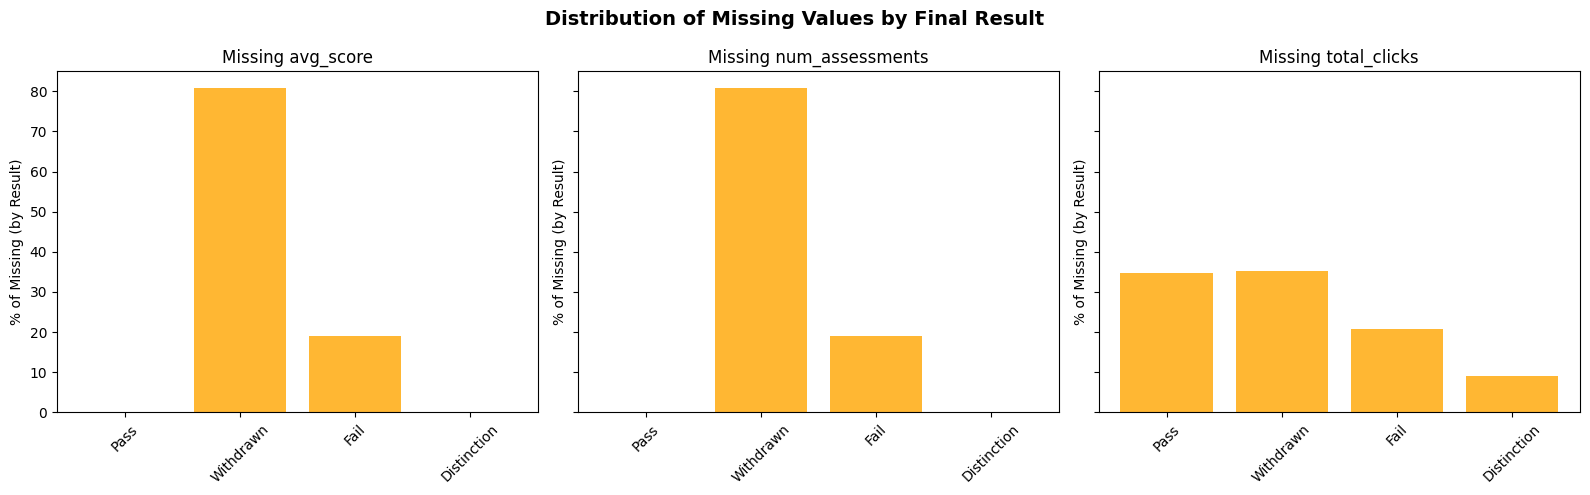

In [49]:
import matplotlib.pyplot as plt

cols_to_check = ['avg_score', 'num_assessments', 'total_clicks']
results = df['final_result'].unique()

fig, axes = plt.subplots(1, len(cols_to_check), figsize=(16, 5), sharey=True)

for i, col in enumerate(cols_to_check):
    missing_data = df[df[col].isnull()]['final_result'].value_counts(normalize=True) * 100
    missing_data = missing_data.reindex(results, fill_value=0)  # keep consistent order

    axes[i].bar(missing_data.index, missing_data.values, color='orange', alpha=0.8)
    axes[i].set_title(f"Missing {col}", fontsize=12)
    axes[i].set_ylabel("% of Missing (by Result)")
    axes[i].set_xticklabels(missing_data.index, rotation=45)

plt.suptitle("Distribution of Missing Values by Final Result", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


**Approach to Handle Missing Values:**

We first identified that missing values were mostly for withdrawn students. Then, instead of dropping them entirely, we:

Kept the missing values where they were meaningful (e.g., avg_score missing for withdrawn students).

For other features, we imputed or filled missing values using zeros or appropriate defaults.

This allowed the model to learn the pattern that missing activity often indicates withdrawal, improving prediction accuracy.

In [ ]:
# Fill missing values

# Registration
final_df['days_registered'] = final_df['days_registered'].fillna(final_df['days_registered'].median())

# Assessments (missing = no attempts)
final_df['avg_score'] = final_df['avg_score'].fillna(0)
final_df['num_assessments'] = final_df['num_assessments'].fillna(0)
final_df['num_missed_assessments'] = final_df['num_missed_assessments'].fillna(0)

# VLE activity (missing = no clicks recorded)
final_df['total_clicks'] = final_df['total_clicks'].fillna(0)
final_df['avg_clicks'] = final_df['avg_clicks'].fillna(0)


In [51]:
final_df.isnull().sum()

,0
final_result,0
age_band,0
num_of_prev_attempts,0
studied_credits,0
disability,0
days_registered,0
avg_score,0
num_assessments,0
num_missed_assessments,0
total_clicks,0


After this we performed data preprocessing to prepare the dataset for modeling. This included encoding categorical features like age_band and disability, and scaling the numeric features

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# 2. Encode categorical variables
# Encode disability (Yes/No → 1/0)
final_df['disability'] = final_df['disability'].map({'Y': 1, 'N': 0})

# Encode age_band using LabelEncoder
le_age = LabelEncoder()
final_df['age_band'] = le_age.fit_transform(final_df['age_band'])

# Encode final_result (target variable)
result_map = {'Fail': 0, 'Pass': 1, 'Withdrawn': 2, 'Distinction': 3}
final_df['final_result'] = final_df['final_result'].map(result_map)

# 3. Scale numeric featuresa
scaler = StandardScaler()
num_cols = ['num_of_prev_attempts', 'studied_credits', 'days_registered',
            'avg_score', 'num_assessments', 'num_missed_assessments',
            'total_clicks', 'avg_clicks', 'module_presentation_length']

final_df[num_cols] = scaler.fit_transform(final_df[num_cols])


/tmp/ipython-input-3415107728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['disability'] = final_df['disability'].map({'Y': 1, 'N': 0})
/tmp/ipython-input-3415107728.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['age_band'] = le_age.fit_transform(final_df['age_band'])
/tmp/ipython-input-3415107728.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [53]:
final_df.head(10)

,final_result,age_band,num_of_prev_attempts,studied_credits,disability,days_registered,avg_score,num_assessments,num_missed_assessments,total_clicks,avg_clicks,module_presentation_length
0,1,2,-0.340229,3.901543,0,1.515269,-0.077641,-0.067745,-0.739794,0.429685,1.966942,0.90978
1,1,1,-0.340229,-0.481083,0,0.541207,-0.077641,-0.067745,-0.265994,0.911596,1.102961,0.90978
2,2,1,-0.340229,-0.481083,1,-1.452863,-1.233458,-0.067745,1.750691,-0.198434,1.320853,0.90978
3,1,1,-0.340229,-0.481083,0,0.532018,-0.077641,-0.067745,-0.557563,1.607048,1.053166,0.90978
4,1,0,-0.340229,-0.481083,0,1.671487,-0.077641,-0.067745,0.098467,0.525875,0.861142,0.90978
5,1,1,-0.340229,-0.481083,0,1.064995,-0.077641,-0.067745,-0.314589,1.883113,1.129903,0.90978
6,1,0,-0.340229,-0.481083,0,0.669857,-0.077641,-0.067745,-0.314589,0.966424,1.626643,0.90978
7,1,0,-0.340229,0.979792,0,0.320665,-0.077641,-0.067745,-0.448225,0.904863,0.710963,0.90978
8,1,0,-0.340229,0.249355,0,0.357422,-0.077641,-0.067745,-0.417853,1.353107,1.016278,0.90978
9,1,2,-0.340229,-0.481083,0,1.699055,-0.077641,-0.067745,-0.618307,2.568946,1.197432,0.90978


Here we checked how our target variable final_result is related to other coulumns so that we can move further with feature engineering

In [54]:
#Check for corelation
correlations = final_df.corr()['final_result'].sort_values(ascending=False)
print(correlations)


final_result                  1.000000
studied_credits               0.079224
num_missed_assessments        0.064866
total_clicks                  0.046826
age_band                      0.043842
module_presentation_length    0.036312
disability                    0.010362
num_assessments              -0.018842
avg_clicks                   -0.021597
num_of_prev_attempts         -0.066507
avg_score                    -0.090409
days_registered              -0.420385
Name: final_result, dtype: float64



Here the dataset is split  into **features (`X`)** and **target (`y`)**, then further into **training and testing sets** using an 80-20 split.

Next, we defined three machine learning models:

* **Logistic Regression** (simple linear model for multi-class prediction)
* **Random Forest** (ensemble of decision trees)
* **XGBoost** (boosted decision trees for better accuracy)

 Each model  was trained on the training data and predicted the outcomes on the test set.

* **Accuracy** – how many predictions were correct overall
* **Macro F1** – average F1 score giving equal weight to all classes
* **Weighted F1** – average F1 score weighted by class frequency

Finally the results was stored in a table (`results_df`) to **compare the performance of all three models**.


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Split data
X = final_df.drop(columns=['final_result'])
y = final_df['final_result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class="multinomial"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train & evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        "Accuracy": acc,
        "Macro F1": report["macro avg"]["f1-score"],
        "Weighted F1": report["weighted avg"]["f1-score"]
    }

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:20:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                     Accuracy  Macro F1  Weighted F1
Logistic Regression  0.789692  0.722616     0.784053
Random Forest        0.812088  0.754659     0.810341
XGBoost              0.822519  0.765449     0.819667


# **Ensemble techniques for improved accuracy**

An ensemble model was created using Logistic Regression, Random Forest, and XGBoost combined with a soft voting classifier to utilize the strengths of all three models.

In [56]:
from sklearn.metrics import accuracy_score
xgb=models["XGBoost"]
#y_pred = xgb.predict(X_test)
# For training data
y_train_pred = xgb.predict(X_train)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Training Accuracy: 0.8962951599294317
Test Accuracy: 0.8225187912256481


In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split data
X = final_df.drop(columns=["final_result"])
y = final_df["final_result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base models
log_reg = LogisticRegression(max_iter=500, class_weight="balanced")
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

# Ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[("lr", log_reg), ("rf", rf), ("xgb", xgb)],voting="soft"
# soft = use predicted probabilities, usually better
)

# Train
ensemble.fit(X_train, y_train)

# Predictions
y_pred = ensemble.predict(X_test)

# Evaluation
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("Weighted F1:", f1_score(y_test, y_pred, average="weighted"))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble Accuracy: 0.8133149256020862
Macro F1: 0.767582944275056
Weighted F1: 0.8148891812523789


# **Save Model**

Based on our evaluation, XGBoost demonstrated the best performance on this dataset. Therefore, we will proceed to save the trained XGBoost model for future use.

In [58]:
import joblib

# Save the model
import joblib
joblib.dump(models["XGBoost"], "xgb_withdraw_student_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [59]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [60]:
joblib.dump(le_age, "le_age.pkl")

['le_age.pkl']